# Import Required Libraries

In [1]:
import wordcloud
import matplotlib.pyplot as plt
import os
import pathlib

# Custom Error handling

In [2]:
class FileNotFoundError(Exception):
    def __init__(self,filename):
        self.filename=filename

    def __str__(self):
        return f"file {self.filename} doesn't exist."
    
class InvalidInputDataError(Exception):
    def __init__(self,content):
        self.content=content

    def __str__(self):
        return f"invalid input data error: {self.content}"

class DiskSpaceFullError(Exception):
    def __init__(self,content):
        self.content=content

    def __str__(self):
        return f"DiskSpaceFullError : {self.content}"

# Process the text from the given file.

In [3]:
def Processing_text_file(filename): 
    with open(filename,'r') as file:
        content=file.read().lower()
        if not isinstance(content,str):
            raise InvalidInputDataError("Expected String but got non-string value.")
        if not content.strip():
            raise InvalidInputDataError("Input data is missing or empty.")
        special=',."\''
        for i in special:
            content=content.replace(i,'')
        words=content.split()
        word_dic={}
        for word in words:
            if word in word_dic:
                word_dic[word]+=1
            else:
                word_dic[word]=1
        char_dic={}
        for char in content:
            if char in char_dic:
                char_dic[char]+=1
            else:
                char_dic[char]=1
        file_wc=wordcloud.WordCloud()
        file_wc.generate(content)
    return word_dic,char_dic,file_wc

# Show Word Cloud generated during file processing.

In [4]:
def showCloud(wc):
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Store the Output in the output file

In [5]:
def StoreOutput(word_dic,char_dic):
    try:
        with open('output.txt','w') as file:
            file.write("Word Frequencies:\n")
            for k,v in word_dic.items():
                file.write(f"{k}:{v}\n")
            file.write("Character frequencies:\n")
            for k,v in char_dic.items():
                file.write(f"{k}:{v}\n")
    except OSError as e:
        if "No Space left on device" in str(e):
            raise DiskSpaceFullError()
    else:
        print("The inputted text has been processed and the output file has been saved in files.")

# Main function 

In [10]:
def askuser():
    f=input("enter the file name: ")
    parts = f.split()
    if len(parts) > 1:
        file_path = os.path.join(*parts)
    else:
        file_path = parts[0] 
    file=pathlib.Path(file_path)
    try:
        if file.is_file():
            result=Processing_text_file(file)
            del result[1][' ']
            del result[1]['\n']
            StoreOutput(result[0],result[1])
            showCloud(result[2])
        else:
            raise FileNotFoundError(file)
    except FileNotFoundError as e:
        print(e)

The inputted text has been processed and the output file has been saved in files.


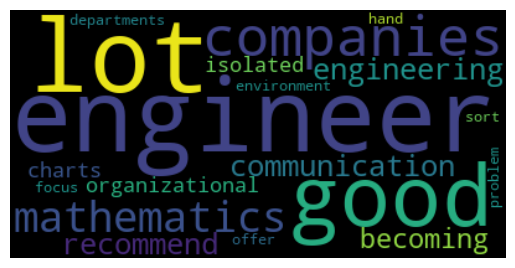

In [11]:
if __name__ == "__main__":
    askuser()